In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/arbac/Downloads/LicentaAIModel/car_price_prediction.csv")

In [3]:
# Check for duplicate rows in the DataFrame
duplicate_rows = data[data.duplicated()]

# Remove duplicate rows
data = data.drop_duplicates()

In [4]:
#Transform the name of tle columns to snake case
data.columns = data.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')\

#----------------------------------------------------------------------------
#LEVY

# Replace '-' with NaN in the 'Levy' column
data['levy'] = data['levy'].replace('-', np.nan)

data['levy'] = data['levy'].astype(float)

#----------------------------------------------------------------------------
#ENGINE VALUE

# Ensure all values in 'engine_volume' are strings
data['engine_volume'] = data['engine_volume'].astype(str)

# Create a new binary column 'is_turbo'
data['is_turbo'] = data['engine_volume'].apply(lambda x: 1 if 'Turbo' in x else 0)

# Extract the numeric part of 'engine_volume'
data['engine_volume'] = data['engine_volume'].str.replace(' Turbo', '').astype(float)

# Handle NaN and infinity values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

#----------------------------------------------------------------------------
#MILEAGE

data['mileage'] = data['mileage'].str.replace(' km', '').astype(int)

#----------------------------------------------------------------------------
#LEATHER INTERIOR

data['leather_interior'] = data['leather_interior'].map({'Yes': 1, 'No': 0})


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'levy'}>],
       [<AxesSubplot:title={'center':'prod._year'}>,
        <AxesSubplot:title={'center':'leather_interior'}>,
        <AxesSubplot:title={'center':'engine_volume'}>],
       [<AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'airbags'}>],
       [<AxesSubplot:title={'center':'is_turbo'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

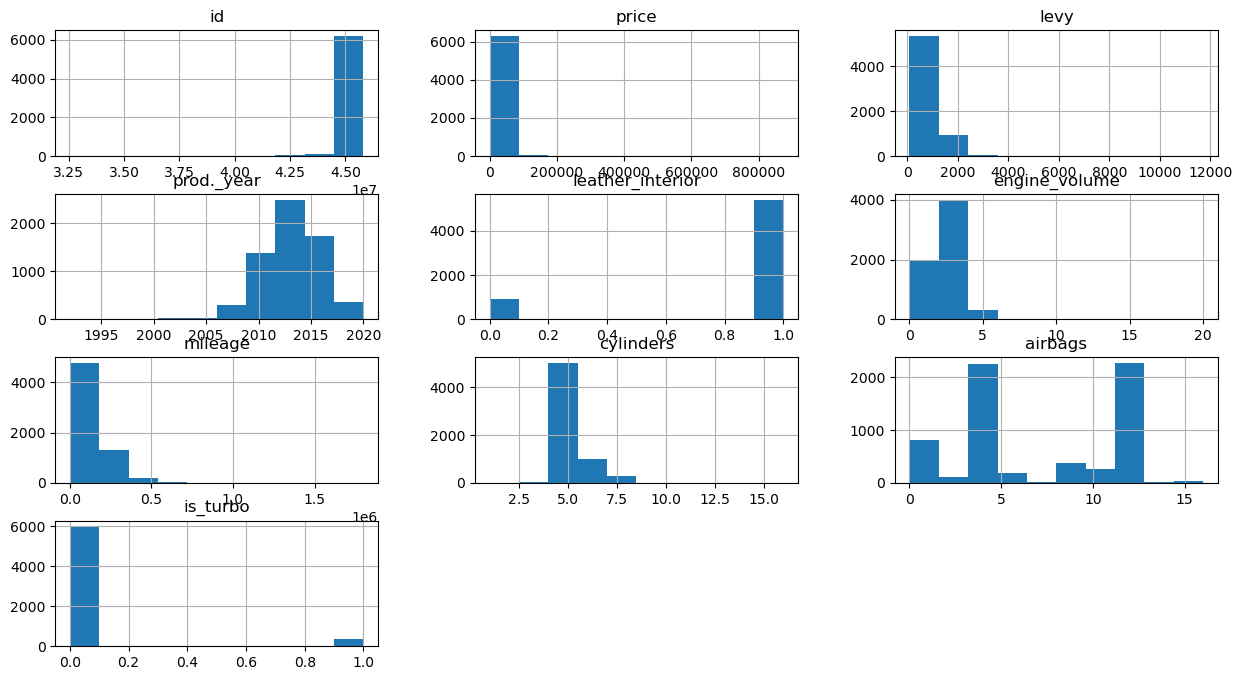

In [5]:
data.hist(figsize=(15,8))

In [6]:
data['prod._year']=np.log(data['prod._year']+1)
data['mileage']=np.log(data['mileage']+1)
data['levy']=np.log(data['levy']+1)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'levy'}>],
       [<AxesSubplot:title={'center':'prod._year'}>,
        <AxesSubplot:title={'center':'leather_interior'}>,
        <AxesSubplot:title={'center':'engine_volume'}>],
       [<AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'airbags'}>],
       [<AxesSubplot:title={'center':'is_turbo'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

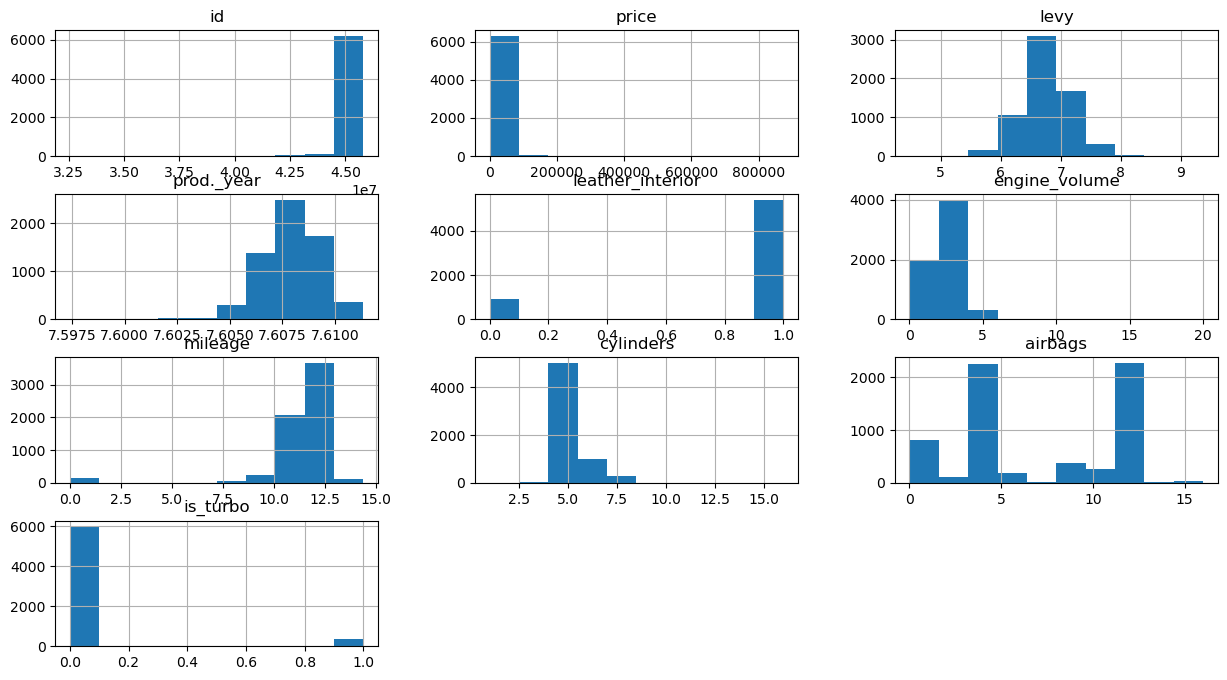

In [7]:
data.hist(figsize=(15,8))


In [8]:
data


,id,price,levy,manufacturer,model,prod._year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags,is_turbo
0,45654403,13328,7.244228,LEXUS,RX 450,7.606387,Jeep,1,Hybrid,3.5,12.133534,6.0,Automatic,4x4,4-May,Left wheel,Silver,12.0,0
1,44731507,16621,6.926577,CHEVROLET,Equinox,7.606885,Jeep,0,Petrol,3.0,12.165256,6.0,Tiptronic,4x4,4-May,Left wheel,Black,8.0,0
3,45769185,3607,6.760415,FORD,Escape,7.606885,Jeep,1,Hybrid,2.5,12.037459,4.0,Automatic,4x4,4-May,Left wheel,White,0.0,0
4,45809263,11726,6.102559,HONDA,FIT,7.608374,Hatchback,1,Petrol,1.3,11.428478,4.0,Automatic,Front,4-May,Left wheel,Silver,4.0,0
5,45802912,39493,6.793466,HYUNDAI,Santa FE,7.609367,Jeep,1,Diesel,2.0,11.988737,4.0,Automatic,Front,4-May,Left wheel,White,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9154,45801622,20005,6.369901,HYUNDAI,Elantra,7.606885,Sedan,1,Petrol,1.6,11.576998,4.0,Automatic,Front,4-May,Left wheel,Black,4.0,0
9155,45810592,16778,6.641182,CHEVROLET,Orlando,7.608871,Jeep,1,LPG,2.0,10.443746,4.0,Automatic,Front,4-May,Left wheel,Grey,4.0,0
9156,45068478,26657,6.656727,MAZDA,CX-5,7.608374,Jeep,0,Petrol,2.5,11.527183,4.0,Automatic,Front,4-May,Left wheel,Black,10.0,0
9157,45686742,21953,7.191429,NISSAN,X-Terra,7.606885,Jeep,1,Petrol,4.0,11.285196,6.0,Automatic,4x4,4-May,Left wheel,Silver,6.0,0


In [ ]:

categorical_columns = ['manufacturer', 'model', 'category', 'fuel_type', 'gear_box_type', 'drive_wheels','doors','wheel','color']

# Apply one-hot encoding to categorical columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [21]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Define features and target variable
x_train = data.drop(['price'], axis=1)
y_train = data['price']

scaler=StandardScaler()
x_train_s=scaler.fit_transform(x_train)


# Fit the linear regression model
reg = LinearRegression()
reg.fit(x_train_s, y_train)

# Evaluate the model
y_pred = reg.predict(x_test)
reg.score(x_test, y_test)


C:\Users\arbac\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\arbac\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-2.4673016300000606e+25

In [10]:
data.columns

Index(['id', 'price', 'levy', 'prod._year', 'leather_interior',
       'engine_volume', 'mileage', 'cylinders', 'airbags', 'is_turbo',
       ...
       'color_Green', 'color_Grey', 'color_Orange', 'color_Pink',
       'color_Purple', 'color_Red', 'color_Silver', 'color_Sky blue',
       'color_White', 'color_Yellow'],
      dtype='object', length=640)

In [11]:
y_pred = reg.predict(x_test)

In [14]:
reg.score(x_test, y_test)

-1855177600.4324105

In [15]:
data


,id,price,levy,prod._year,leather_interior,engine_volume,mileage,cylinders,airbags,is_turbo,...,color_Green,color_Grey,color_Orange,color_Pink,color_Purple,color_Red,color_Silver,color_Sky blue,color_White,color_Yellow
0,45654403,13328,7.244228,7.606387,1,3.5,12.133534,6.0,12.0,0,...,0,0,0,0,0,0,1,0,0,0
1,44731507,16621,6.926577,7.606885,0,3.0,12.165256,6.0,8.0,0,...,0,0,0,0,0,0,0,0,0,0
3,45769185,3607,6.760415,7.606885,1,2.5,12.037459,4.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
4,45809263,11726,6.102559,7.608374,1,1.3,11.428478,4.0,4.0,0,...,0,0,0,0,0,0,1,0,0,0
5,45802912,39493,6.793466,7.609367,1,2.0,11.988737,4.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9154,45801622,20005,6.369901,7.606885,1,1.6,11.576998,4.0,4.0,0,...,0,0,0,0,0,0,0,0,0,0
9155,45810592,16778,6.641182,7.608871,1,2.0,10.443746,4.0,4.0,0,...,0,1,0,0,0,0,0,0,0,0
9156,45068478,26657,6.656727,7.608374,0,2.5,11.527183,4.0,10.0,0,...,0,0,0,0,0,0,0,0,0,0
9157,45686742,21953,7.191429,7.606885,1,4.0,11.285196,6.0,6.0,0,...,0,0,0,0,0,0,1,0,0,0


In [28]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [29]:
forest.score(x_test,y_test)

0.9700912656846779

In [19]:
from sklearn.ensemble import BaggingRegressor
bagging=BaggingRegressor()
bagging.fit(x_train, y_train)

BaggingRegressor()

In [20]:
bagging.score(x_test,y_test)

0.7186584986745315

In [51]:
from sklearn.model_selection import GridSearchCV

forest=RandomForestRegressor()
param_grid={
    "n_estimators": [56,57,58],
    "max_features": [44,45,46],
}

grid_search=GridSearchCV(forest, param_grid, cv=5,
                         scoring="neg_mean_squared_error",
                         return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [44, 45, 46],
                         'n_estimators': [56, 57, 58]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [52]:
best_forest=grid_search.best_estimator_
print("Best Estimator:", best_forest)
best_forest.score(x_test,y_test)

Best Estimator: RandomForestRegressor(max_features=46, n_estimators=57)


0.9676356900052608

In [60]:
car_instance = pd.DataFrame({
    'manufacturer': ['LEXUS'],
    'model': ['RX 450'],
    'prod._year': [2010],
    'category': ['Jeep'],
    'leather_interior': ['Yes'],
    'fuel_type': ['Hybrid'],
    'engine_volume': ['3.5'],
    'mileage': ['186005 km'],
    'cylinders': [6],
    'gear_box_type': ['Automatic'],
    'drive_wheels': ['4x4'],
    'doors': ['4-May'],
    'wheel': ['Left wheel'],
    'color': ['Silver'],
    'prod_year': [12]
})

# Preprocess the specific car instance
car_instance.columns = car_instance.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')
car_instance['leather_interior'] = car_instance['leather_interior'].map({'Yes': 1, 'No': 0})
car_instance['levy'] = car_instance['levy'].replace('-', np.nan).astype(float)
car_instance['mileage'] = car_instance['mileage'].str.replace(' km', '').astype(int)
car_instance['engine_volume'] = car_instance['engine_volume'].astype(str)
car_instance['is_turbo'] = car_instance['engine_volume'].apply(lambda x: 1 if 'Turbo' in x else 0)
car_instance['engine_volume'] = car_instance['engine_volume'].str.replace(' Turbo', '').astype(float)

# Apply logarithmic transformation to the car instance
car_instance['prod._year'] = np.log(car_instance['prod._year'] + 1)
car_instance['mileage'] = np.log(car_instance['mileage'] + 1)
car_instance['levy'] = np.log(car_instance['levy'] + 1)

categorical_columns = ['manufacturer', 'model', 'category', 'fuel_type', 'gear_box_type', 'drive_wheels','doors','wheel','color']

# Apply one-hot encoding to the categorical columns
car_instance = pd.get_dummies(car_instance, columns=categorical_columns, drop_first=True)

# Ensure all columns match the training data
x_train_columns = x_train.columns  # Get the columns from the training data
car_instance = car_instance.reindex(columns=x_train_columns, fill_value=0)

# Scale the features using the same scaler as the training data
car_instance_scaled = scaler.transform(car_instance)

# Predict the price using the best estimator
predicted_price = best_forest.predict(car_instance_scaled)
print(f"Predicted Price: {predicted_price[0]}")

Predicted Price: 12936.456140350878


C:\Users\arbac\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [58]:
car_instance

,id,levy,prod._year,leather_interior,engine_volume,mileage,cylinders,airbags,is_turbo,manufacturer_AUDI,...,color_Green,color_Grey,color_Orange,color_Pink,color_Purple,color_Red,color_Silver,color_Sky blue,color_White,color_Yellow
0,45654403,1399.0,2010,1,3.5,186005,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
data

,id,price,levy,prod._year,leather_interior,engine_volume,mileage,cylinders,airbags,is_turbo,...,color_Green,color_Grey,color_Orange,color_Pink,color_Purple,color_Red,color_Silver,color_Sky blue,color_White,color_Yellow
0,45654403,13328,7.244228,7.606387,1,3.5,12.133534,6.0,12.0,0,...,0,0,0,0,0,0,1,0,0,0
1,44731507,16621,6.926577,7.606885,0,3.0,12.165256,6.0,8.0,0,...,0,0,0,0,0,0,0,0,0,0
3,45769185,3607,6.760415,7.606885,1,2.5,12.037459,4.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
4,45809263,11726,6.102559,7.608374,1,1.3,11.428478,4.0,4.0,0,...,0,0,0,0,0,0,1,0,0,0
5,45802912,39493,6.793466,7.609367,1,2.0,11.988737,4.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9154,45801622,20005,6.369901,7.606885,1,1.6,11.576998,4.0,4.0,0,...,0,0,0,0,0,0,0,0,0,0
9155,45810592,16778,6.641182,7.608871,1,2.0,10.443746,4.0,4.0,0,...,0,1,0,0,0,0,0,0,0,0
9156,45068478,26657,6.656727,7.608374,0,2.5,11.527183,4.0,10.0,0,...,0,0,0,0,0,0,0,0,0,0
9157,45686742,21953,7.191429,7.606885,1,4.0,11.285196,6.0,6.0,0,...,0,0,0,0,0,0,1,0,0,0


NameError: name 'pd' is not defined